In [1]:
# import analysis packages
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# import dataset
(imgTrain, lblTrain), (imgTest, lblTest) = cifar10.load_data()

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

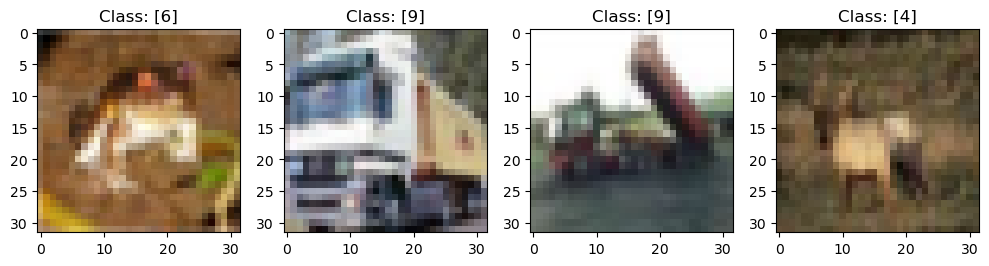

In [3]:
# check dimensions of data
display(imgTrain.shape)
display(lblTrain.shape)
display(imgTest.shape)
display(lblTest.shape)

# plot first few training images
myplot, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
for i in range(4):
    axes[i].imshow(imgTrain[i], cmap=plt.cm.binary)
    axes[i].title.set_text(f"Class: {lblTrain[i]}")
myplot.tight_layout()

In [4]:
# scale image data
imgTrain = imgTrain.astype('float32') / 255
imgTest = imgTest.astype('float32') / 255

# factor categorical response
lblTrain = to_categorical(lblTrain)
lblTest = to_categorical(lblTest)

In [5]:
# model fitting and evaluation function
def EvaluateModel(model, BATCH = 32):
    # set random seed
    np.random.seed(4252023)
    tf.random.set_seed(4252023)

    # compile model
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    PRINTSUM = False
    try:
        # model summary
        model.summary()
    except:
        PRINTSUM = True
        pass

    # number of epochs
    EPOCHS = 50

    # early stopping criteria
    earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    # train model
    trained = model.fit(imgTrain, 
                        lblTrain, 
                        epochs = EPOCHS, 
                        batch_size = BATCH, 
                        validation_split = 0.2,
                        callbacks = earlyStop,
                        verbose = 2)
    
    # if PRINTSUM:
        # model summary
        # model.summary()

    # prepare model evaluation
    acc = trained.history['accuracy']
    val_acc = trained.history['val_accuracy']
    loss = trained.history['loss']
    val_loss = trained.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # final validation accuracy
    display(f"Validation accuracy: {round(val_acc[-1] * 100, 2)}%")

    # plot training accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))
    ax1.plot(epochs, acc, 'bo', label = 'Training acc')
    ax1.plot(epochs, val_acc, 'b', label = 'Validation acc')
    ax1.set(xlabel = 'Epochs', ylabel = 'Accuracy')
    ax1.legend()
    ax2.plot(epochs, loss, 'bo', label = 'Training loss')
    ax2.plot(epochs, val_loss, 'b', label = 'Validation loss')
    ax2.set(xlabel = 'Epochs', ylabel = 'Loss')
    ax2.legend()
    fig.suptitle('Evaluation Metrics')

In [ ]:
# define model architecture
model = models.Sequential([
    RandomRotation(factor = 0.5, fill_mode = 'constant', fill_value = 0, seed = 42923),
    RandomZoom(height_factor = (-0.2, -0.05), width_factor = (-0.2, -0.05), seed = 42923),
    RandomFlip(seed = 42923),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model, 16)